In [3]:
%matplotlib ipympl

In [11]:
import scipy.optimize as so
import csv
import numpy as np
from impedance.preprocessing import readGamry
from impedance.visualization import plot_nyquist
import matplotlib.pyplot as plt
from impedance.preprocessing import readCSV, readBioLogic
from impedance.visualization import plot_nyquist,plot_bode
from impedance.models.circuits import CustomCircuit

In [12]:
dta_file_path1="kaushik_file.DTA"
fexp,Zexp =readGamry(dta_file_path1)

R :  82.03216775073511
Q :  6.850391519620454e-06
α :  0.8035306741800401


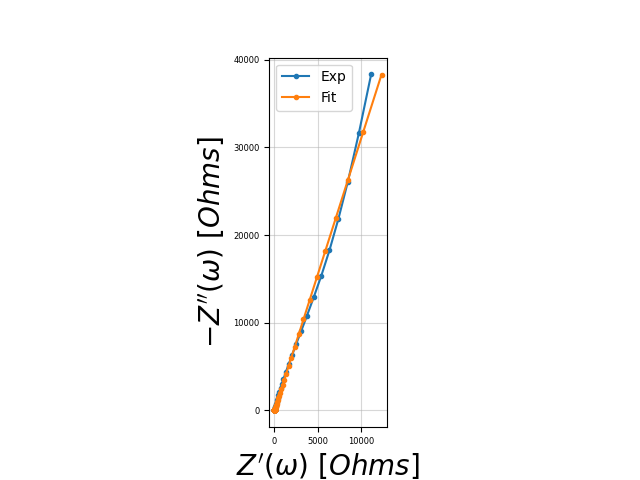

In [26]:
c_to_fit=CustomCircuit(initial_guess=[80,1e-3,0.9],circuit="R_1-CPE_1")
axax=c_to_fit.fit(impedance=Zexp,frequencies=fexp,bounds=(0,[np.inf,np.inf,1]))
# print(c_to_fit)

Z_fit=c_to_fit.predict(frequencies=fexp)

fig, ax =plt.subplots()
plot_nyquist(Zexp,ax=ax)
plot_nyquist(Z_fit,ax=ax)
ax.tick_params(labelsize=6)
ax.legend(["Exp","Fit"])

for pname,pval in zip(["R","Q","α"],c_to_fit.parameters_):
    print(pname,": ",pval)
